## MATH285 Lab Code
**Group Name:** MATH285gg  

**Group Member and student ID:**  
Jun Liang     3210112584  
Yujie Pan     3210112494  
Xinchen Yin   3210112483  
Ziming Yan    3210111502  
Xingjian Kang 3210110763  

In [1]:
import math
from matplotlib import pyplot as plt
import numpy as np
import sympy as sp

In [2]:
def func(t, y):
    return (y - t ** 2) * (y ** 2 - t)
    # return y             # for test
    # return math.cos(t)   # for test

In [3]:
class NumericalSols:
    def __init__(self, y_0, step, lower_bound, upper_bound, method_num):
        self.t_0 = 0
        self.y_0 = y_0
        assert(lower_bound <= 0 and upper_bound >= 0)
        self.lower_bound = lower_bound
        self.upper_bound = upper_bound
        self.step = step
        self.t_all = []
        self.y_all = []
        self.method_num = method_num
        if method_num == 0:
            self.eulerMethod()
        elif method_num == 1:
            self.impEuler()
        elif method_num == 2:
            self.runge4thMethod()
        elif method_num == 3:
            self.linearMulStep()
        elif method_num == 4:
            self.powerSeries()
        else:
            raise NotImplementedError

    # method_num: 0
    def eulerMethod(self):
        # less than 0
        i = 1
        y_n = t_n = 0
        while t_n >= self.lower_bound:
            if i == 1:
                i = 0
                y_n = self.y_0
                t_n = self.t_0
            self.y_all.insert(0, y_n)
            self.t_all.insert(0, t_n)
            y_n = y_n + func(t_n, y_n) * (-self.step)
            t_n = t_n + (-self.step)
        
        # larger than 0   
        i = 1
        y_n = t_n = 0
        while t_n <= self.upper_bound:
            if i == 1:
                i = 0
                y_n = self.y_0
                t_n = self.t_0
            self.y_all.append(y_n)
            self.t_all.append(t_n)

            y_n = y_n + func(t_n, y_n) * self.step
            t_n = t_n + self.step

    # 1
    def impEuler(self):
        i = 1
        y_n = t_n = 0
        while t_n >= self.lower_bound:
            if i == 1:
                i = 0
                y_n = self.y_0
                t_n = self.t_0
            self.y_all.insert(0, y_n)
            self.t_all.insert(0, t_n)
            y_n_euler = y_n + func(t_n, y_n) * (-self.step)    # improved from Euler Method
            y_n = y_n + 0.5 * (-self.step) * (func(t_n, y_n) + func(t_n + (-self.step), y_n_euler))
            t_n = t_n + (-self.step)
        
        i = 1
        y_n = t_n = 0
        while t_n <= self.upper_bound:
            if i == 1:
                i = 0
                y_n = self.y_0
                t_n = self.t_0
            self.y_all.append(y_n)
            self.t_all.append(t_n)

            y_n_euler = y_n + func(t_n, y_n) * self.step    # improved from Euler Method
            y_n = y_n + 0.5 * self.step * (func(t_n, y_n) + func(t_n + self.step, y_n_euler))
            t_n = t_n + self.step
    
    # 2
    def runge4thMethod(self):
        i = 1
        y_n = t_n = 0
        while t_n >= self.lower_bound:
            if i == 1:
                i = 0
                y_n = self.y_0
                t_n = self.t_0
            self.y_all.insert(0, y_n)
            self.t_all.insert(0, t_n)
            k1 = self.step * func(y_n, t_n)
            k2 = self.step * func(y_n + 0.5 * k1, t_n + 0.5 * self.step)
            k3 = self.step * func(y_n + 0.5 * k2, t_n + 0.5 * self.step)
            k4 = self.step * func(y_n + k3, t_n + self.step)
            y_n = y_n - (k1 + 2 * k2 + 2 * k3 + k4) / 6.0
            t_n = t_n + (-self.step)
        
        i = 1
        y_n = t_n = 0
        while t_n <= self.upper_bound:
            if i == 1:
                i = 0
                y_n = self.y_0
                t_n = self.t_0
            self.y_all.append(y_n)
            self.t_all.append(t_n)

            k1 = self.step * func(y_n, t_n)
            k2 = self.step * func(y_n + 0.5 * k1, t_n + 0.5 * self.step)
            k3 = self.step * func(y_n + 0.5 * k2, t_n + 0.5 * self.step)
            k4 = self.step * func(y_n + k3, t_n + self.step)
            y_n = y_n + (k1 + 2 * k2 + 2 * k3 + k4) / 6.0
            t_n = t_n + self.step
    
    # 3
    def linearMulStep(self):
        pass
    
    # 4 
    def powerSeries(self):
        # pass
        a = np.zeros(100, dtype=float)
        b = np.zeros(100, dtype=float)
        c = np.zeros(100, dtype=float)
        a[0] = self.y_0
        a[1] = c[0]
        self.help_bc(a, b, c, 1)
        a[2] = (c[1]-a[0])/2
        self.help_bc(a, b, c, 2)
        a[3] = (c[2]-b[0]-a[1])/3 
        self.help_bc(a, b, c, 3)
        a[4] = (c[3]-b[1]-a[2]+1)/4 
        for i in range(4,90):
            self.help_bc(a, b, c, i)
            a[i+1] = (c[i]-b[i-2]-a[i-1])/(i+1)

        self.help_PwrSrs(a, b, c, -1)
        self.help_PwrSrs(a, b, c, 1)
    
    def help_bc(self, a, b, c, i):
        for j in range(i+1):
            b[i] += a[j]*a[i-j]
        for j in range(i+1):
            c[i] += a[j]*b[i-j]

    def help_PwrSrs(self, a, b, c, dir):
        i = 1
        y_n = t_n = 0
        while (t_n>=self.lower_bound and t_n<=self.upper_bound):
            if i == 1:
                i = 0
                y_n = self.y_0
                t_n = self.t_0
            if(dir==1):
                self.y_all.append(y_n)
                self.t_all.append(t_n)
            elif(dir==-1):
                self.y_all.insert(0, y_n)
                self.t_all.insert(0, t_n)

            y_n = 0
            for i in range(90):
                y_n += a[i] * (t_n ** i)
                # print(i, "a=", a[i], "b=", b[i], "c=", c[i])
            t_n = t_n + dir* self.step



    def draw(self):
        plt.xlabel('t', fontsize=19)
        plt.ylabel('y', fontsize=19)
        plt.plot(self.t_all, self.y_all, c="red")


In [4]:
def testDiffMethods(y_0, step, lower_bound, upper_bound):
    """
    Test different methods according to the given parameters by drawing plots.
    """
    # eulerMethod
    euler_meth = NumericalSols(y_0, step, lower_bound, upper_bound, 0)
    plt.plot(euler_meth.t_all, euler_meth.y_all, c="green", label="Euler method")
    
    # impEuler
    im_eu_meth = NumericalSols(y_0, step, lower_bound, upper_bound, 1)
    plt.plot(im_eu_meth.t_all, im_eu_meth.y_all, c="red", label="Improve Euler method")
    
    # runge4thMethod
    runge_meth = NumericalSols(y_0, step, lower_bound, upper_bound, 2)
    plt.plot(runge_meth.t_all, runge_meth.y_all, c="blue", label="Runge 4th order")
    
    # linearMulStep
    mulstep_meth = NumericalSols(y_0, step, lower_bound, upper_bound, 3)
    plt.plot(mulstep_meth.t_all, mulstep_meth.y_all, c="black", label="Linear MultiStep")
    
    # powerSeries method
    power_meth = NumericalSols(y_0, step, lower_bound, upper_bound, 4)
    plt.plot(power_meth.t_all, power_meth.y_all, c="orange", label="Power series")
    

In [5]:
def testDiffSteps(y_0, lower_bound, upper_bound, method_num):
    """
    Test one method with different steps by drawing plots.
    """
    # step == 0.2
    meth1 = NumericalSols(y_0, 0.2, lower_bound, upper_bound, method_num)
    plt.plot(meth1.t_all, meth1.y_all, c="green", label="step=0.2")
    
    # step == 0.1
    meth2 = NumericalSols(y_0, 0.1, lower_bound, upper_bound, method_num)
    plt.plot(meth2.t_all, meth2.y_all, c="red", label="step=0.1")
    
    # step == 0.05
    meth3 = NumericalSols(y_0, 0.05, lower_bound, upper_bound, method_num)
    plt.plot(meth3.t_all, meth3.y_all, c="blue", label="step=0.05")
    

In [6]:
def plotDiffMethods(y_0, step, lower_bound, upper_bound):
    # fig=plt.figure(num=1,figsize=(8,6))
    plt.xlabel('t', fontsize=19)
    plt.ylabel('y', fontsize=19)

    # ax1 = fig.add_subplot(311)
    # ax1.set_title("311")
    testDiffMethods(y_0, step, lower_bound, upper_bound)

    plt.legend()
    plt.show()

In [7]:
def plotDiffSteps(y_0, lower_bound, upper_bound, method_num):
    plt.xlabel('t', fontsize=19)
    plt.ylabel('y', fontsize=19)

    testDiffSteps(y_0, lower_bound, upper_bound, method_num)

    plt.legend()
    plt.show()  
    pass

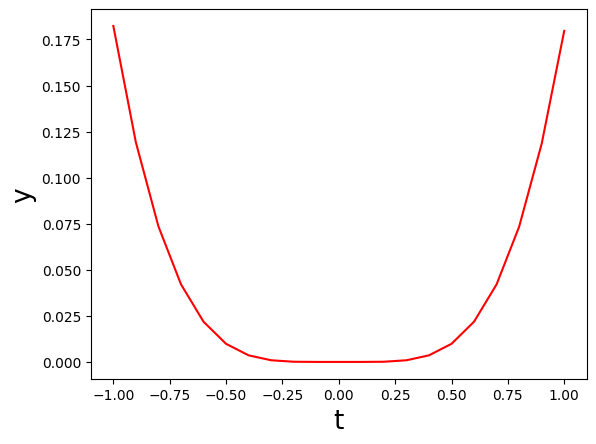

In [8]:
# Euler Method with step = 0.1, IVP1
euler_1 = NumericalSols(0, 0.1, -1, 1, 0)
euler_1.draw()

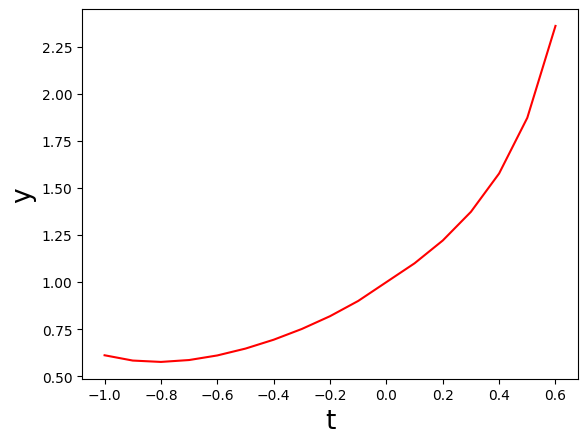

In [9]:
# Euler Method with step = 0.1, IVP2
euler_2 = NumericalSols(1, 0.1, -1, 0.6, 0)
euler_2.draw()

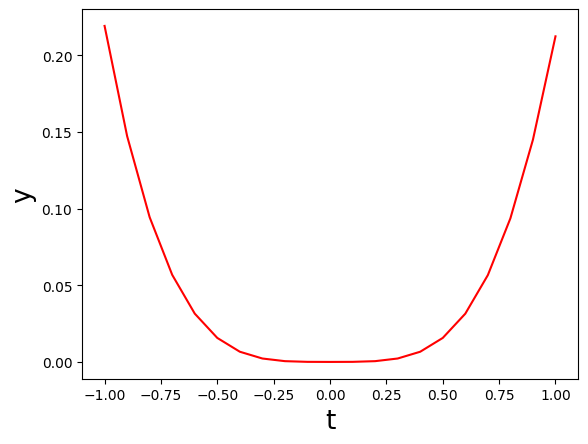

In [10]:
# improve Euler Method with step = 0.1, IVP1
plt.xlabel('t', fontsize=19)
plt.ylabel('y', fontsize=19)
im_euler_1 = NumericalSols(0, 0.1, -1, 1, 1)
im_euler_1.draw()

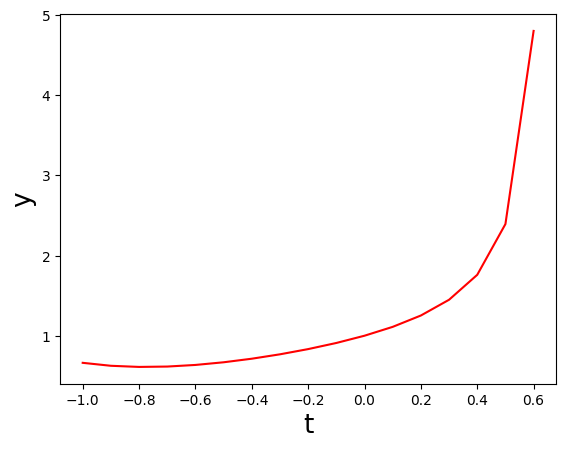

In [11]:
# improve Euler Method with step = 0.1, IVP2
plt.xlabel('t', fontsize=19)
plt.ylabel('y', fontsize=19)
im_euler_2 = NumericalSols(1, 0.1, -1, 0.6, 1)
im_euler_2.draw()

0 a= 0.0 b= 0.0 c= 0.0
1 a= 0.0 b= 0.0 c= 0.0
2 a= 0.0 b= 0.0 c= 0.0
3 a= 0.0 b= 0.0 c= 0.0
4 a= 0.25 b= 0.0 c= 0.0
5 a= 0.0 b= 0.0 c= 0.0
6 a= -0.041666666666666664 b= 0.0 c= 0.0
7 a= 0.0 b= 0.0 c= 0.0
8 a= 0.005208333333333333 b= 0.0625 c= 0.0
9 a= 0.0 b= 0.0 c= 0.0
10 a= -0.0005208333333333333 b= -0.020833333333333332 c= 0.0
11 a= -0.005681818181818182 b= 0.0 c= 0.0
12 a= 4.340277777777778e-05 b= 0.004340277777777777 c= 0.015625
13 a= 0.0032415501165501165 b= 0.0 c= 0.0
14 a= -3.1001984126984127e-06 b= -0.0006944444444444444 c= -0.0078125
15 a= -0.0010262885262885262 b= -0.002840909090909091 c= 0.0
16 a= 1.937624007936508e-07 b= 9.223090277777778e-05 c= 0.002278645833333333
17 a= 0.00023525757670978258 b= 0.002094259906759907 c= 0.0
18 a= 0.00015781751825046095 b= -1.0592344576719577e-05 c= -0.0004955150462962963
19 a= -4.3315975041255615e-05 b= -0.0008424590455840455 c= -0.001065340909090909
20 a= -0.00016587091670506384 b= 1.0786106977513228e-06 c= 8.816189236111111e-05
21 a= 6.76

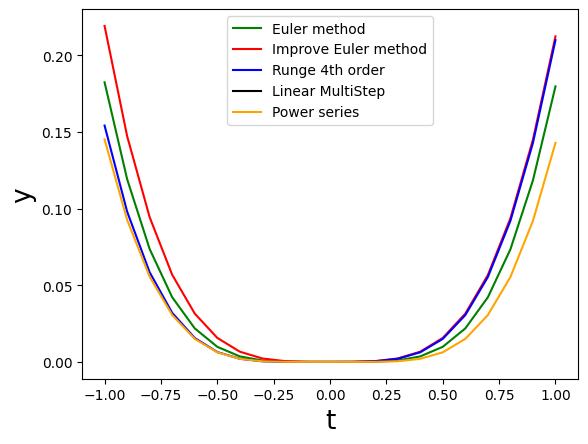

0 a= 0.0 b= 0.0 c= 0.0
1 a= 0.0 b= 0.0 c= 0.0
2 a= 0.0 b= 0.0 c= 0.0
3 a= 0.0 b= 0.0 c= 0.0
4 a= 0.25 b= 0.0 c= 0.0
5 a= 0.0 b= 0.0 c= 0.0
6 a= -0.041666666666666664 b= 0.0 c= 0.0
7 a= 0.0 b= 0.0 c= 0.0
8 a= 0.005208333333333333 b= 0.0625 c= 0.0
9 a= 0.0 b= 0.0 c= 0.0
10 a= -0.0005208333333333333 b= -0.020833333333333332 c= 0.0
11 a= -0.005681818181818182 b= 0.0 c= 0.0
12 a= 4.340277777777778e-05 b= 0.004340277777777777 c= 0.015625
13 a= 0.0032415501165501165 b= 0.0 c= 0.0
14 a= -3.1001984126984127e-06 b= -0.0006944444444444444 c= -0.0078125
15 a= -0.0010262885262885262 b= -0.002840909090909091 c= 0.0
16 a= 1.937624007936508e-07 b= 9.223090277777778e-05 c= 0.002278645833333333
17 a= 0.00023525757670978258 b= 0.002094259906759907 c= 0.0
18 a= 0.00015781751825046095 b= -1.0592344576719577e-05 c= -0.0004955150462962963
19 a= -4.3315975041255615e-05 b= -0.0008424590455840455 c= -0.001065340909090909
20 a= -0.00016587091670506384 b= 1.0786106977513228e-06 c= 8.816189236111111e-05
21 a= 6.76

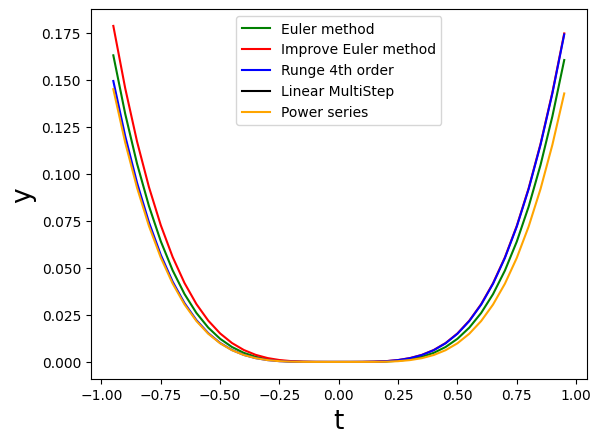

0 a= 0.0 b= 0.0 c= 0.0
1 a= 0.0 b= 0.0 c= 0.0
2 a= 0.0 b= 0.0 c= 0.0
3 a= 0.0 b= 0.0 c= 0.0
4 a= 0.25 b= 0.0 c= 0.0
5 a= 0.0 b= 0.0 c= 0.0
6 a= -0.041666666666666664 b= 0.0 c= 0.0
7 a= 0.0 b= 0.0 c= 0.0
8 a= 0.005208333333333333 b= 0.0625 c= 0.0
9 a= 0.0 b= 0.0 c= 0.0
10 a= -0.0005208333333333333 b= -0.020833333333333332 c= 0.0
11 a= -0.005681818181818182 b= 0.0 c= 0.0
12 a= 4.340277777777778e-05 b= 0.004340277777777777 c= 0.015625
13 a= 0.0032415501165501165 b= 0.0 c= 0.0
14 a= -3.1001984126984127e-06 b= -0.0006944444444444444 c= -0.0078125
15 a= -0.0010262885262885262 b= -0.002840909090909091 c= 0.0
16 a= 1.937624007936508e-07 b= 9.223090277777778e-05 c= 0.002278645833333333
17 a= 0.00023525757670978258 b= 0.002094259906759907 c= 0.0
18 a= 0.00015781751825046095 b= -1.0592344576719577e-05 c= -0.0004955150462962963
19 a= -4.3315975041255615e-05 b= -0.0008424590455840455 c= -0.001065340909090909
20 a= -0.00016587091670506384 b= 1.0786106977513228e-06 c= 8.816189236111111e-05
21 a= 6.76

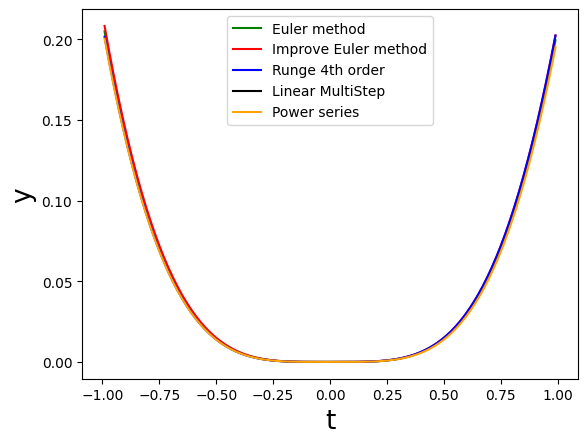

In [12]:
# IVP1, compare methods with different steps
plotDiffMethods(0, 0.1, -1, 1)  # step == 0.1
plotDiffMethods(0, 0.05, -1, 1) # step == 0.05
plotDiffMethods(0, 0.01, -1, 1) # step == 0.01

0 a= 1.0 b= 0.0 c= 0.0
1 a= 0.0 b= 0.0 c= 0.0
2 a= -0.5 b= -1.0 c= -1.0
3 a= -0.3333333333333333 b= -0.6666666666666666 c= -0.6666666666666666
4 a= 0.20833333333333334 b= 0.6666666666666667 c= 1.1666666666666667
5 a= 0.5000000000000001 b= 1.3333333333333335 c= 2.0
6 a= 0.40972222222222215 b= 0.7222222222222221 c= 0.40277777777777757
7 a= -0.10912698412698418 b= -0.8571428571428574 c= -2.3849206349206353
8 a= -0.5159970238095238 b= -1.7316468253968256 c= -3.1413690476190483
9 a= -0.4171626984126985 b= -0.7900132275132276 c= -0.15509259259259217
10 a= 0.12180472883597893 b= 1.2530753968253971 c= 4.08363921957672
11 a= 0.5665862493987495 b= 2.258585858585859 c= 4.648053451178452
12 a= 0.4430218291546417 b= 0.886093950416867 c= -0.30372362012987103
13 a= -0.1633373281810783 b= -1.7537023740148745 c= -6.374994912494914
14 a= -0.6483287571596724 b= -2.8947364336501247 c= -6.508975662854012
15 a= -0.4821154856726534 b= -0.9675824541052713 c= 1.125382827829506
16 a= 0.2204633724377533 b= 2.406

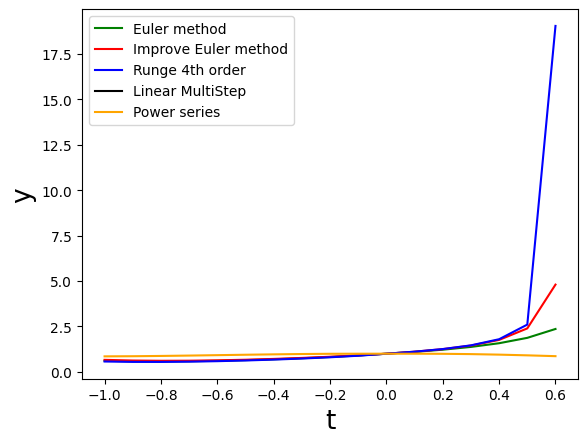

0 a= 1.0 b= 0.0 c= 0.0
1 a= 0.0 b= 0.0 c= 0.0
2 a= -0.5 b= -1.0 c= -1.0
3 a= -0.3333333333333333 b= -0.6666666666666666 c= -0.6666666666666666
4 a= 0.20833333333333334 b= 0.6666666666666667 c= 1.1666666666666667
5 a= 0.5000000000000001 b= 1.3333333333333335 c= 2.0
6 a= 0.40972222222222215 b= 0.7222222222222221 c= 0.40277777777777757
7 a= -0.10912698412698418 b= -0.8571428571428574 c= -2.3849206349206353
8 a= -0.5159970238095238 b= -1.7316468253968256 c= -3.1413690476190483
9 a= -0.4171626984126985 b= -0.7900132275132276 c= -0.15509259259259217
10 a= 0.12180472883597893 b= 1.2530753968253971 c= 4.08363921957672
11 a= 0.5665862493987495 b= 2.258585858585859 c= 4.648053451178452
12 a= 0.4430218291546417 b= 0.886093950416867 c= -0.30372362012987103
13 a= -0.1633373281810783 b= -1.7537023740148745 c= -6.374994912494914
14 a= -0.6483287571596724 b= -2.8947364336501247 c= -6.508975662854012
15 a= -0.4821154856726534 b= -0.9675824541052713 c= 1.125382827829506
16 a= 0.2204633724377533 b= 2.406

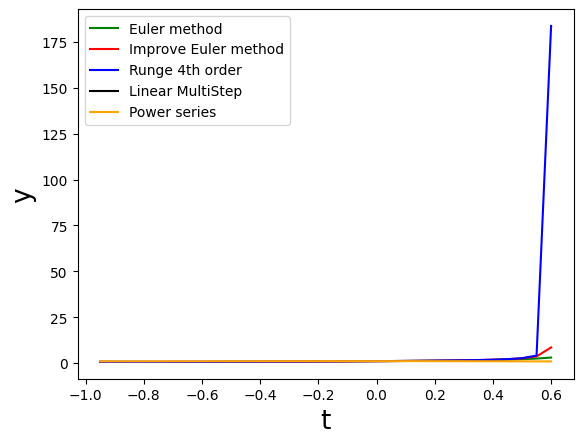

OverflowError: (34, 'Result too large')

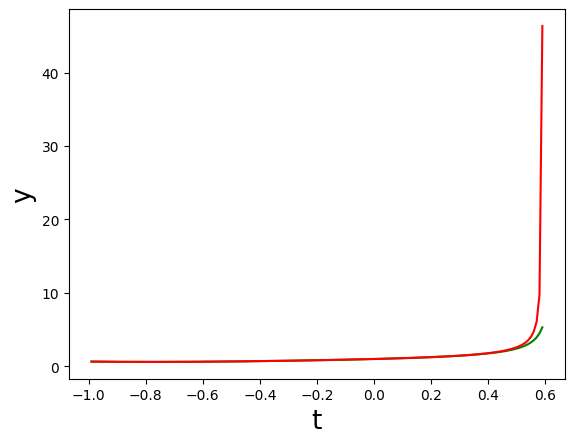

In [13]:
# IVP2, compare methods with different steps
plotDiffMethods(1, 0.1, -1, 0.6)  # step == 0.1
plotDiffMethods(1, 0.05, -1, 0.6) # step == 0.05
plotDiffMethods(1, 0.01, -1, 0.6) # step == 0.01

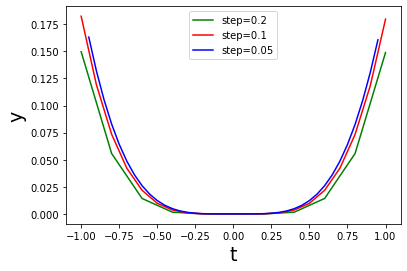

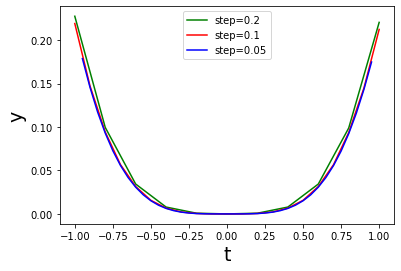

In [ ]:
# IVP1, compare one method with different steps
plotDiffSteps(0, -1, 1, 0) # Euler
plotDiffSteps(0, -1, 1, 1) # improve Euler
                           # others

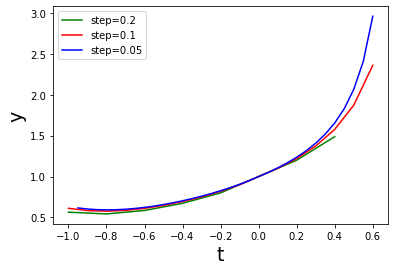

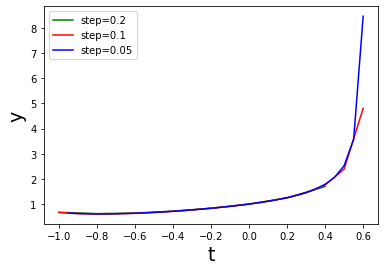

In [ ]:
# IVP2, compare one method with different steps
plotDiffSteps(1, -1, 0.6, 0) # Euler
plotDiffSteps(1, -1, 0.6, 1) # improve Euler
                             # others